# <center>Network Science</center>

## <center>Home Assignment #1: Power law</center>

### <center>Student: *{Feygina Anastasia}*</center>

## Problems

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
plt.xkcd()
import numpy as np
%matplotlib inline

### Task 1.

Load [wordcounts](http://www.leonidzhukov.net/hse/2015/networks/data/wordcounts.txt) dataset. 
1. Check that Zipf's Law holds
2. Assuming that the data is distributed according to the Power Law, find
 * $\alpha$ of the distribution
 * mean sample variance $\sigma^2$
3. Produce summary of the frequencies: min, max, mean, median

### SOLUTION:

#### 1. Check that Zipf's Law holds

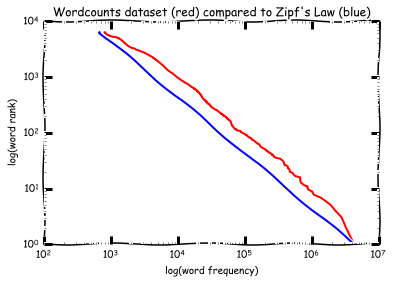

In [5]:
# download dataset
D = np.genfromtxt('wordcounts.txt')
# make array of ranks in ascending order
ranks = np.arange(1, len(D)+1)

# calculate word frequency according to Zipf's Law
zipfs_law = []
counter = 1
for i in range(len(D)):
    zipfs_law.append(D[0,0] / counter)
    counter = counter + 1

# plot 'Wordcounts dataset compared to Zipf's Law' in log-log scale
plt.loglog(D[:,0], ranks, c='r')
plt.loglog(zipfs_law, ranks, c='b')
plt.title("Wordcounts dataset (red) compared to Zipf's Law (blue)")
plt.xlabel("log(word frequency)")
plt.ylabel("log(word rank)")

From plot above we can see that in general Zipf's Law holds.

#### 2.1 Assuming that the data is distributed according to the Power Law, find $\alpha$ of the distribution

In [6]:
alpha = 1 + ( len(D[:,0]) / np.sum(np.log(D[:,0]/np.min(D[:,0]))) )
print('Alpha =', alpha)

Alpha = 1.72003784381


#### 2.2 Assuming that the data is distributed according to the Power Law, find mean sample variance $\sigma^2$

In [7]:
var = np.var(D[:,0])
print('Sample variance =', var)

Sample variance = 9328603898.63


#### 3. Produce summary of the frequencies: min, max, mean, median

In [10]:
print('min =', np.min(D[:,0]))
print('max =', np.max(D[:,0]))
print('mean =', np.mean(D[:,0]))

min = 800.0
max = 4239632.0
mean = 12589.3555485


$\alpha$ is less than 2. It means that mean and variance don't make any sense as they depend on the sample size. Instead of mean we can calculate median.

In [11]:
print('median =', np.median(D[:,0]))

median = 2335.0


### <hr /> Task 2.

Find and plot PDF and CDF for the following networks:
* [Routing network](http://www.leonidzhukov.net/hse/2015/networks/data/network.txt)
* [Web graph](http://www.leonidzhukov.net/hse/2015/networks/data/web_Stanford.txt)
* [Facebook network](http://www.leonidzhukov.net/hse/2015/networks/data/fb_Princeton.txt)


1. Are they correspondent to power law?
2. Find max and mean values of incoming and outcoming node degrees
3. Find $\alpha$ via Maximum Likelihood and calculate $\sigma^2$
4. Determine $x_{min}$ via Kolmogorov-Smirnov test

### SOLUTION:

#### 1. Find and plot PDF and CDF. Are they correspondent to power law?

Let's prepare some functions:

In [36]:
def data_preparation(filename, graph_type='all'):
    G = nx.read_edgelist(filename+'.txt', create_using = nx.DiGraph())
    # parse nodes degree
    if graph_type == 'undirected_graph':
        nodes_degree = np.array(list(G.degree().values()), dtype = np.int)
    elif graph_type == 'in_directed_graph':
        nodes_degree = np.array(list(G.in_degree().values()), dtype = np.int)
    elif graph_type == 'out_directed_graph':
        nodes_degree = np.array(list(G.out_degree().values()), dtype = np.int)
    else:
        raise Exception("Put graph type correctly!")
    number_of_nodes_with_k_links = np.bincount(nodes_degree)   
    pdf = number_of_nodes_with_k_links.astype(float) / G.number_of_nodes()
    cdf = np.cumsum(pdf)
    return nodes_degree, number_of_nodes_with_k_links, pdf, cdf
  
def find_pdf_cdf(filename):
    if filename != 'web_Stanford':
        in_nodes_degree, in_number_of_nodes_with_k_links, in_pdf, in_cdf = data_preparation(filename, 'undirected_graph')
        out_nodes_degree, out_number_of_nodes_with_k_links, out_pdf, out_cdf = data_preparation(filename, 'undirected_graph')
    else:
        in_nodes_degree, in_number_of_nodes_with_k_links, in_pdf, in_cdf = data_preparation(filename, 'in_directed_graph')
        out_nodes_degree, out_number_of_nodes_with_k_links, out_pdf, out_cdf = data_preparation(filename, 'out_directed_graph')
        
    plt.figure(figsize=(20,5))
        
    plt.subplot(1,3,1)
    plt.loglog(np.arange(0, len(in_pdf)), in_pdf, 'b.')
    plt.loglog(np.arange(0, len(out_pdf)), out_pdf, 'r.')
    plt.title("PDF of {}".format(filename))
    plt.xlabel("in/out node degrees")
    plt.ylabel("PDF")
        
    plt.subplot(1,3,2)
    plt.loglog(np.arange(0, len(in_cdf)), in_cdf, 'b.')
    plt.loglog(np.arange(0, len(out_cdf)), out_cdf, 'r.')
    plt.title("CDF of {}".format(filename))
    plt.xlabel("in/out node degrees")
    plt.ylabel("CDF")

    plt.subplot(1,3,3)
    plt.loglog(np.arange(0, len(1-in_cdf)), 1-in_cdf, 'b.')
    plt.loglog(np.arange(0, len(1-out_cdf)), 1-out_cdf, 'r.')
    plt.title("Complementary CDF of {}".format(filename))
    plt.xlabel("in/out node degrees")
    plt.ylabel("cCDF")

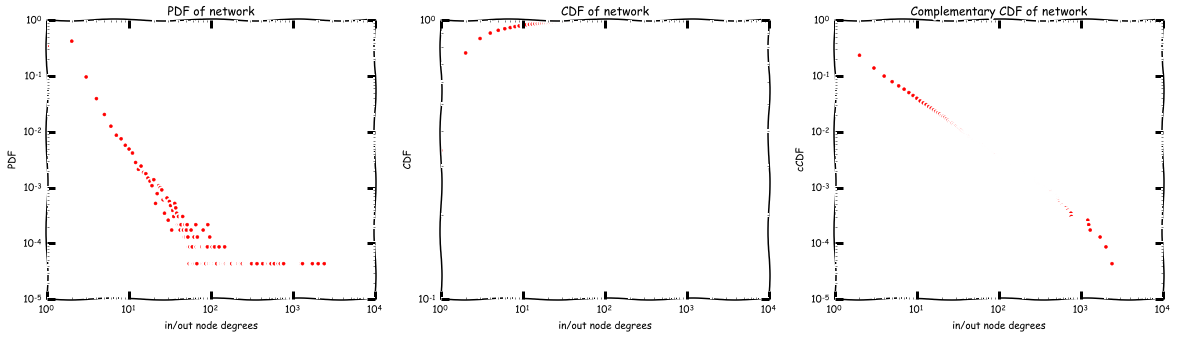

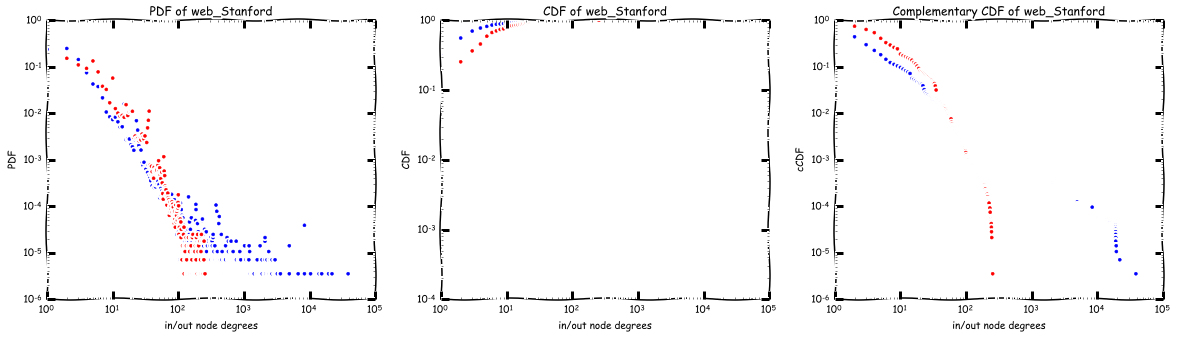

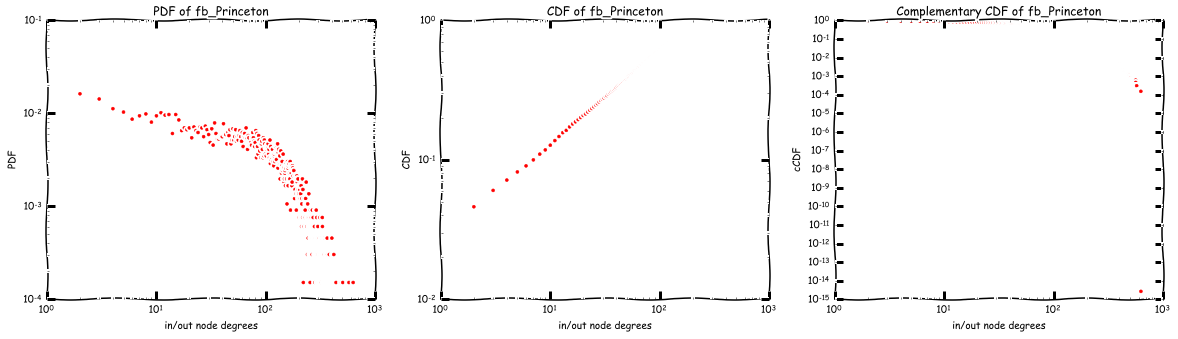

In [37]:
find_pdf_cdf('network')
find_pdf_cdf('web_Stanford')
find_pdf_cdf('fb_Princeton')

Routing_network and Web_graph datasets are satisfy Power law but Facebook_network dataset doesn't.

#### 2. Find max and mean values of incoming and outcoming node degrees

In [39]:
def find_max_mean_values(filename):
    if filename != 'web_Stanford':
        nodes_degree, number_of_nodes_with_k_links, pdf, cdf = data_preparation(filename, 'undirected_graph')
        print("Max value of node degree for {} = {}".format(filename, np.max(nodes_degree)))
        print("Mean value of node degree for {} = {}\n".format(filename, np.mean(nodes_degree)))
    else:
        in_nodes_degree, in_number_of_nodes_with_k_links, in_pdf, in_cdf = data_preparation(filename, 'in_directed_graph')
        out_nodes_degree, out_number_of_nodes_with_k_links, out_pdf, out_cdf = data_preparation(filename, 'out_directed_graph')
        print("Max value of incoming node degree for {} = {}".format(filename, np.max(in_nodes_degree)))
        print("Max value of outcoming node degree for {} = {}".format(filename, np.max(out_nodes_degree)))
        print("Mean value of node degree for {} = {}\n".format(filename, np.mean(in_nodes_degree)))

In [40]:
find_max_mean_values('network')
find_max_mean_values('web_Stanford')
find_max_mean_values('fb_Princeton')

Max value of node degree for network = 2390
Mean value of node degree for network = 4.218612550624918

Max value of incoming node degree for web_Stanford = 38606
Max value of outcoming node degree for web_Stanford = 255
Mean value of node degree for web_Stanford = 8.203165627893283

Max value of node degree for fb_Princeton = 628
Mean value of node degree for fb_Princeton = 88.93875075803517



#### 3-4. Determine $x_{min}$ via Kolmogorov-Smirnov test. Find $\alpha$ via Maximum Likelihood and calculate $\sigma^2$

1. find $x_{min}$ via Kolmogorov-Smirnov test

2. find $\alpha$ via Maximum Likelihood

3. calculate $\sigma^2$ in respect to this $x_{min}$.

In [41]:
def kolmogorov_smirnov_test(filename, graph_type='undirected_graph'):
    nodes_degree, number_of_nodes_with_k_links, pdf, cdf = data_preparation(filename, graph_type)
    max_distance = []
    for x_min in range(1, max(nodes_degree)-1):
        nodes_degree_obs_by_x_min = np.arange(1,max(nodes_degree)+1).astype(float)[x_min-1:] / x_min
        alpha = 1 + ( len(nodes_degree_obs_by_x_min) / np.sum(np.log(nodes_degree_obs_by_x_min)) )
        power_law_cdf = 1 - (nodes_degree_obs_by_x_min)**(1 - alpha)
        exp_pdf = number_of_nodes_with_k_links.astype(float)[x_min:] / np.sum(number_of_nodes_with_k_links.astype(float)[x_min:])
        exp_cdf = np.cumsum(exp_pdf)
        M = max(abs(exp_cdf - power_law_cdf))
        max_distance.append(M)
    ideal_x_min = max_distance.index(min(max_distance))+1
    ideal_nodes_degree_obs_by_x_min = np.arange(1,max(nodes_degree)+1).astype(float)[ideal_x_min-1:] / ideal_x_min
    ideal_alpha = 1 + ( len(ideal_nodes_degree_obs_by_x_min) / np.sum(np.log(ideal_nodes_degree_obs_by_x_min)) )
    ideal_var = (ideal_alpha - 1)**2 / len(ideal_nodes_degree_obs_by_x_min) 
    print("For {}_{}: x_min = {}, alpha = {} and variance = {}.\n".format(filename, graph_type, ideal_x_min, ideal_alpha, ideal_var))

In [42]:
kolmogorov_smirnov_test('network')
kolmogorov_smirnov_test('web_Stanford', 'in_directed_graph')
kolmogorov_smirnov_test('web_Stanford', 'out_directed_graph')
kolmogorov_smirnov_test('fb_Princeton')

For network_undirected_graph: x_min = 1104, alpha = 3.296939462471138 and variance = 0.004099402404240248.

For web_Stanford_in_directed_graph: x_min = 3593, alpha = 1.618020775895082 and variance = 1.0908484590105647e-05.

For web_Stanford_out_directed_graph: x_min = 172, alpha = 5.770602385767367 and variance = 0.2709362752748725.

For fb_Princeton_undirected_graph: x_min = 428, alpha = 5.905130362408265 and variance = 0.11970300433940018.

